# Activité : SGBD - SQL

Le langage SQL (Structured Query Language) est principalement utilisé par les SGBD et les bases de données relationnelles.

Les commandes SQL exécutées ci-après vont :
- créer les tables de la base de données libres.db
- insérer des données dans les tables
- interroger les données des tables
- ajouter et modifier des données de certaines tables

Pour effectuer ces commandes, on utilise des CLAUSE sql : SELECT, WHERE ,DISTINCT, ORDER BY, INSERT INTO, UPDATE.

## Création des tables

La commande précédente crée une base de données mais elle est vide.

On crée les 5 relations en respectant le schéma relationnel réalisé en activité.
On met en place les contraintes d'intégrité:

- les clefs primaires pour chaque table sont initialisées avec la clause PRIMARY KEY
- les clefs étrangères sont initialisées avec la clause REFERENCES suivi de la clef primaire utilisée.
- la table de jointure entre les tables livre et theme.

```sql
CREATE TABLE IF NOT EXISTS 'livre' (
    id_livre INT PRIMARY KEY,
    titre VARCHAR(90) NOT NULL,
    ann_pub INT,
    id_auteur INT REFERENCES auteur (id_auteur),
    id_langue INT REFERENCES langue (id_langue)
);

CREATE TABLE IF NOT EXISTS 'auteur'(
    id_auteur INT PRIMARY KEY,
    nom VARCHAR(40) NOT NULL,
    prenom  VARCHAR(40) NOT NULL,
    ann_naiss INT NOT NULL
);

CREATE TABLE IF NOT EXISTS 'genre'(
    id_genre INT PRIMARY KEY,
    theme VARCHAR(40) NOT NULL
);

CREATE TABLE IF NOT EXISTS 'langue'(
    id_langue INT PRIMARY KEY,
    langue VARCHAR(30) NOT NULL
);

CREATE TABLE IF NOT EXISTS 'livre_par_genre' (
    id_livre INT REFERENCES livre (id_livre),
    id_genre INT REFERENCES genre (id_genre),
    PRIMARY KEY (id_livre,id_genre)
);
```

## Insertion de données

Les 5 relations sont vides. Il faut les compléter avec les valeurs du tableau vu en activité.

```sql
INSERT INTO 'livre' VALUES
(1,'1984',1949,1,1),
(2,'Dune',1965,2,1),
(3,'Fondation',1951,3,1),
(4,'Le meilleur des mondes',1931,4,1),
(5,'Farenheit',1953,5,1),
(6,'Ubik',1969,6,1),
(7,'Chroniques martiennes',1950,5,1),
(8,'La nuit des temps',1968,7,1),
(9,'Blade runner',1968,6,1),
(10,'Les robots',1950,3,1),
(11,'La planète des singes',1963,8,2),
(12,'Ravage',1943,7,1),
(13,'Le maitre du haut chateau',1962,6,1),
(14,'Le monde des A',1945,9,1),
(15,'La fin de l\'éternité',1955,3,1),
(16,'De la terre à la lune',1865,10,2);

INSERT INTO 'auteur' VALUES
(1,'Orwell','George',1903),
(2,'Herbert','Franck',1920),
(3,'Asimov','Isaac',1920),
(4,'Huxley','Aldous',1894),
(5,'Bradbury','Ray',1920),
(6,'K.Dick','Philip',1928),
(7,'Barjavel','René',1911),
(8,'Boulle','Pierre',1912),
(9,'Van Vogt','Alfred Eton',1912),
(10,'Verne','Jules',1828);

INSERT INTO 'genre' VALUES
(1,'totalitarisme'),
(2,'science fiction'),
(3,'anticipation'),
(4,'dystopie'),
(5,'économie'),
(6,'tragédie'),
(7,'intelligence artificielle'),
(8,'uchronie'),
(9,'voyage dans le temps'),
(10,'aventure');

INSERT INTO 'langue' VALUES
(1,'anglais'),
(2,'français'),
(3,'allemand');

INSERT INTO 'livre_par_genre' VALUES
(1,1),(1,2),(1,3),(1,4),
(2,2),(2,3),
(3,2),(3,5),
(4,1),(4,2),(4,4),
(5,2),(5,4),
(6,2),(6,3),
(7,2),(7,3),
(8,2),(8,6),
(9,7),(9,2),
(10,2),(10,7),
(11,2),(11,4),
(12,2),(12,3),
(13,4),(13,8),
(14,2),(14,7),
(15,2),(15,9),
(16,2),(16,10);
```

### Schéma relationnel

On redonne le schéma relationnel de notre base de données livres:

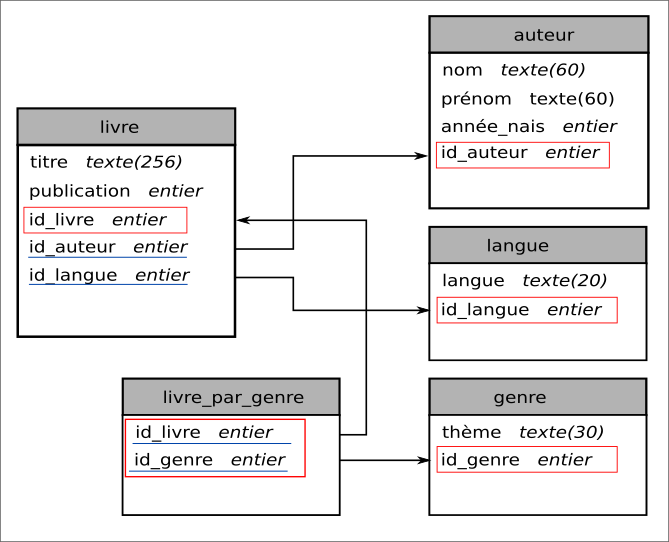

## Requêtes SQL

### Interroger une relation

Interroger une relation pour en extraire toutes les valeurs des attributs requiert la clause *SELECT ... FROM ---* où les trois points sont remplacés par les attributs souhaités séparés par des virgules et les trois tirets sont remplacés par la relation interrogée.

1. Écrire une requête permettant d'obtenir les titres des romans de la base.
2. Écrire une requête permettant d'obtenir les noms et prénoms des auteurs de la base.

In [1]:
SELECT titre FROM livre;

titre
1984
Dune
Fondation
Le meilleur des mondes
Farenheit
Ubik
Chroniques martiennes
La nuit des temps
Blade runner
Les robots


In [2]:
SELECT nom,prenom FROM auteur;

nom,prenom
Orwell,George
Herbert,Franck
Asimov,Isaac
Huxley,Aldous
Bradbury,Ray
K.Dick,Philip
Barjavel,René
Boulle,Pierre
Van Vogt,Alfred Eton
Verne,Jules


### Interroger une relation et trier

Pour ce faire, on ajoute en fin de requête la clause *ORDER BY ... ordre* en remplaçant les trois points par l'attribut souhaité et en indiquant l'ordre souhaité *DESC* ou *ASC*.

1. Écrire une requête permettant d'obtenir les titres des romans de la base rangés par ordre croissant.
2. Écrire une requête permettant d'obtenir les noms et prénoms des auteurs de la base rangés par année de naissance.

In [3]:
SELECT titre FROM livre ORDER BY titre ASC;

titre
1984
Blade runner
Chroniques martiennes
De la terre à la lune
Dune
Farenheit
Fondation
La fin de l'éternité
La nuit des temps
La planète des singes


In [4]:
SELECT nom,prenom FROM auteur ORDER BY ann_naiss;

nom,prenom
Verne,Jules
Huxley,Aldous
Orwell,George
Barjavel,René
Boulle,Pierre
Van Vogt,Alfred Eton
Herbert,Franck
Asimov,Isaac
Bradbury,Ray
K.Dick,Philip


### Requêtes statistiques

Il est parfois utile d'obtenir des informations numériques (statistiques) sur les valeurs d'un attribut : nombre d'enregistrements dans une relation, moyenne, valeur maximale ou minimale ou bien la somme des valeurs.

Pour ce faire, on utilise les **fonctions d'agrégation**. Ces fonctions prennent en paramètre les attributs sur lesquels ils s'appliquent. Cette fonction est placée juste derrière la clause *SELECT*.

1. La fonction *COUNT()* donne le nombre d'enregistrements d'une relation.    
    Écrire une requête donnant le nombre total de romans de la base.

2. Les fonctions *MAX()* et *MIN()* donnent la valeur maximale et minimale d'un attribut.    
    Écrire une requête donnant l'année de naissance du plus jeune auteur.

In [5]:
SELECT COUNT(titre) as 'Nombre romans' FROM livre;

Nombre romans
16


In [6]:
SELECT MAX(ann_naiss) as 'Plus jeune' FROM auteur;

Plus jeune
1928


### Interroger sous condition

Lors d'une requête d'interrogation, il est possible d'y ajouter une **condition**. La clause *WHERE ...* réalise cette opération et sera placée en fin de requête. Les trois points sont remplacés par une condition. Les conditions s'écrivent comme dans les langages de programmation avec les opérateurs habituels.

1. Écrire une requête permettant d'obtenir les titres des romans de la base écrits après 1900.
2. Écrire une requête permettant d'obtenir les noms et prénoms des auteurs de la base nés en 1920.

In [7]:
SELECT titre FROM livre WHERE ann_pub > 1960;

titre
Dune
Ubik
La nuit des temps
Blade runner
La planète des singes
Le maitre du haut chateau


In [8]:
SELECT nom,prenom FROM auteur WHERE ann_naiss = 1920;

nom,prenom
Herbert,Franck
Asimov,Isaac
Bradbury,Ray


### Insérer des valeurs

La clause *INSERT INTO --- VALUES ...* **ajoute** un enregistrement dans une relation. Les trois tirets sont remplacés par le nom de la relation et les noms des attributs et les trois points par les valeurs à insérer dans le même ordre que les attributs.

1. Écrire une requête qui ajoute l'écrivaine J.K. Rowling née en 1965.
2. Écrire une requête qui ajoute le roman "Harry Potter à l'école des sorciers" écrit en 2001. 

In [9]:
INSERT INTO auteur VALUES (11,"Rowling","J.K.",1965);

In [10]:
SELECT * FROM auteur;

id_auteur,nom,prenom,ann_naiss
1,Orwell,George,1903
2,Herbert,Franck,1920
3,Asimov,Isaac,1920
4,Huxley,Aldous,1894
5,Bradbury,Ray,1920
6,K.Dick,Philip,1928
7,Barjavel,René,1911
8,Boulle,Pierre,1912
9,Van Vogt,Alfred Eton,1912
10,Verne,Jules,1828


In [12]:
INSERT INTO livre (id_livre,titre,ann_pub,id_auteur,id_langue) 
VALUES (17,"Harry Potter à l'école des sorciers",2001,11,1);

In [13]:
SELECT * FROM livre;

id_livre,titre,ann_pub,id_auteur,id_langue
1,1984,1949,1,1
2,Dune,1965,2,1
3,Fondation,1951,3,1
4,Le meilleur des mondes,1931,4,1
5,Farenheit,1953,5,1
6,Ubik,1969,6,1
7,Chroniques martiennes,1950,5,1
8,La nuit des temps,1968,7,1
9,Blade runner,1968,6,1
10,Les robots,1950,3,1


### Mise à jour d'une relation

La clause *UPDATE --- SET ...* **modifie** la valeur d'un attribut d'une relation. Les trois tirets sont remplacés par le nom de la relation et les trois points par l'affectation à l'attribut de la nouvelle valeur.

1. Écrire une requête qui modifie le titre du roman "Blade runner" par son titre original.
2. Écrire une requête qui modifie le prénom de l'écrivaine J.K. Rowling par "Joanne" Rowling.

In [14]:
UPDATE livre SET titre = "Les androïdes rêvent-ils de moutons électriques ?" 
WHERE titre = "Blade runner";

In [15]:
SELECT * FROM livre;

id_livre,titre,ann_pub,id_auteur,id_langue
1,1984,1949,1,1
2,Dune,1965,2,1
3,Fondation,1951,3,1
4,Le meilleur des mondes,1931,4,1
5,Farenheit,1953,5,1
6,Ubik,1969,6,1
7,Chroniques martiennes,1950,5,1
8,La nuit des temps,1968,7,1
9,Les androïdes rêvent-ils de moutons électriques ?,1968,6,1
10,Les robots,1950,3,1


In [16]:
UPDATE auteur SET prenom = "Joanne" WHERE prenom = "J.K.";

In [17]:
SELECT * FROM auteur;

id_auteur,nom,prenom,ann_naiss
1,Orwell,George,1903
2,Herbert,Franck,1920
3,Asimov,Isaac,1920
4,Huxley,Aldous,1894
5,Bradbury,Ray,1920
6,K.Dick,Philip,1928
7,Barjavel,René,1911
8,Boulle,Pierre,1912
9,Van Vogt,Alfred Eton,1912
10,Verne,Jules,1828


### Suprimer un enregistrement d'une relation

La clause *DELETE FROM - - - WHERE ...* **supprime** un enregistrement d'une relation. Les trois tirets sont remplacés par le nom de la relation et les trois points par une condition qui précise la valeur de l'attribut à supprimer.

1. Écrire une requête qui supprime le roman "Harry Potter à l'école des sorciers". 
2. Écrire une requête qui supprime l'écrivaine Joanne Rowling.

In [18]:
DELETE FROM livre WHERE titre = "Harry Potter à l'école des sorciers";

In [19]:
SELECT * FROM livre;

id_livre,titre,ann_pub,id_auteur,id_langue
1,1984,1949,1,1
2,Dune,1965,2,1
3,Fondation,1951,3,1
4,Le meilleur des mondes,1931,4,1
5,Farenheit,1953,5,1
6,Ubik,1969,6,1
7,Chroniques martiennes,1950,5,1
8,La nuit des temps,1968,7,1
9,Les androïdes rêvent-ils de moutons électriques ?,1968,6,1
10,Les robots,1950,3,1


In [20]:
DELETE FROM auteur WHERE nom="Rowling" AND prenom="Joanne";

In [21]:
SELECT * FROM auteur;

id_auteur,nom,prenom,ann_naiss
1,Orwell,George,1903
2,Herbert,Franck,1920
3,Asimov,Isaac,1920
4,Huxley,Aldous,1894
5,Bradbury,Ray,1920
6,K.Dick,Philip,1928
7,Barjavel,René,1911
8,Boulle,Pierre,1912
9,Van Vogt,Alfred Eton,1912
10,Verne,Jules,1828


## Autres requêtes SQL

Écrire et exécuter les requêtes suivantes :

2. a) Obtenir les genres de romans ;

    b) Obtenir les titres de romans écrits en 1950 ;
    
    c) Obtenir les romans écrits après 1960 ;
    
    d) Obtenir les romans écrits entre 1900 et 1940 ;
    
    e) Obtenir les auteurs nés avant 1900 ;
    
    f) Obtenir les genres de romans commençant par la lettre s.
    
    g) Ajouter une troisième langue (allemand, italien, espagnol)
    
    h) Ajouter à nouveau l’écrivaine Joanne Rowling ;
    
    i) Ajouter deux romans Harry Potter ;
    
    j) Ajouter les genres fantaisie et sorcellerie.
    
    k) Ajouter dans la relation livre_par_genre les romans d’Harry Potter et leur genre.

In [24]:
-- 2. a) Obtenir les genres de romans ;

SELECT theme FROM genre;

theme
totalitarisme
science fiction
anticipation
dystopie
économie
tragédie
intelligence artificielle
uchronie
voyage dans le temps
aventure


In [25]:
-- b) Obtenir les titres de romans écrits en 1950 ;

SELECT titre FROM livre WHERE ann_pub = 1950;

titre
Chroniques martiennes
Les robots


In [26]:
-- c) Obtenir les romans écrits après 1960 ;

SELECT * FROM livre WHERE ann_pub > 1960;

id_livre,titre,ann_pub,id_auteur,id_langue
2,Dune,1965,2,1
6,Ubik,1969,6,1
8,La nuit des temps,1968,7,1
9,Les androïdes rêvent-ils de moutons électriques ?,1968,6,1
11,La planète des singes,1963,8,2
13,Le maitre du haut chateau,1962,6,1


In [31]:
-- d) Obtenir les romans écrits entre 1900 et 1920 ;

-- SELECT * FROM livre WHERE ann_pub > 1900 AND ann_pub < 1940;
SELECT * FROM livre WHERE ann_pub BETWEEN 1900 AND 1940;

id_livre,titre,ann_pub,id_auteur,id_langue
4,Le meilleur des mondes,1931,4,1


In [32]:
-- e) Obtenir les auteurs nés avant 1900 ;

SELECT * FROM auteur WHERE ann_naiss < 1900;

id_auteur,nom,prenom,ann_naiss
4,Huxley,Aldous,1894
10,Verne,Jules,1828


In [3]:
--   f) Obtenir les genres de romans commençant par la lettre s.

SELECT theme FROM genre WHERE theme LIKE 's%';

theme
science fiction


In [8]:
--   g) Ajouter une troisième langue (allemand, italien, espagnol)

INSERT INTO langue (4,langue) 
VALUES (4,'espagnol');

In [11]:
SELECT * FROM langue;

id_langue,langue
1,anglais
2,français
3,allemand
4,espagnol


In [13]:
--  h) Ajouter à nouveau l’écrivaine Joanne Rowling ;

INSERT INTO auteur(id_auteur,nom,prenom,ann_naiss)
VALUES (11,"Rowling","Joanne",1965);

In [14]:
SELECT * FROM auteur;

id_auteur,nom,prenom,ann_naiss
1,Orwell,George,1903
2,Herbert,Franck,1920
3,Asimov,Isaac,1920
4,Huxley,Aldous,1894
5,Bradbury,Ray,1920
6,K.Dick,Philip,1928
7,Barjavel,René,1911
8,Boulle,Pierre,1912
9,Van Vogt,Alfred Eton,1912
10,Verne,Jules,1828


In [16]:
--  i) Ajouter deux romans Harry Potter ;

INSERT INTO livre(id_livre,titre,ann_pub,id_auteur,id_langue)
VALUES (17,"Harry Potter à l'école des sorciers",1997,11,1),
        (18,"Harry Potter et la chambre des secrets",1998,11,1);

In [17]:
SELECT * FROM livre;

id_livre,titre,ann_pub,id_auteur,id_langue
1,1984,1949,1,1
2,Dune,1965,2,1
3,Fondation,1951,3,1
4,Le meilleur des mondes,1931,4,1
5,Farenheit,1953,5,1
6,Ubik,1969,6,1
7,Chroniques martiennes,1950,5,1
8,La nuit des temps,1968,7,1
9,Blade runner,1968,6,1
10,Les robots,1950,3,1


In [20]:
--   j) Ajouter les genres fantaisie et sorcellerie.

INSERT INTO genre(id_genre,theme)
VALUES (11,"fantaisie"),(12,"sorcellerie");

In [21]:
SELECT * FROM genre;

id_genre,theme
1,totalitarisme
2,science fiction
3,anticipation
4,dystopie
5,économie
6,tragédie
7,intelligence artificielle
8,uchronie
9,voyage dans le temps
10,aventure


In [23]:
--  k) Ajouter dans la relation livre_par_genre les romans d’Harry Potter et leur genre.

INSERT INTO livre_par_genre
VALUES (17,11),(17,12),(18,11),(18,12);

In [24]:
SELECT * FROM livre_par_genre;

id_livre,id_genre
1,1
1,2
1,3
1,4
2,2
2,3
3,2
3,5
4,1
4,2
